In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy.optimize import curve_fit
import numpy as np

In [5]:
df_1 = pd.read_csv('../experiments/tompkin-park/tompkin-1.csv')

df_1['time'] = pd.to_datetime(df_1['time'])

df_1 = df_1.set_index('time')

df_1.index = np.where(df_1.index.hour > 16, df_1.index - pd.Timedelta(hours=4) , df_1.index)

In [6]:
scan_1 = df_1.scanner.unique()

print(scan_1,'\n')


[8971892789936046870 6019242731093492944 5694909940280933621
 3032956252858577392] 



In [8]:
device = {6019242731093492944:'Tablet',1090569457459386979:'Tablet',5361903071078952797:'Tablet',\
         5694909940280933621:'iP7',5110181571686476542:'iP7',6270631897087207153:'iP7',9210533994844007956:'iP7',\
         8971892789936046870:'Android',3767638924627748581:'Android',8625312123004613185:'Android',4617331933211747717:'Android',\
         3032956252858577392:'iP8',3454255993082278590:'iP8',6802690793379487853:'iP8',451756629974301389:'iP8'}

new ------  0
13:40:00


/Users/aliu/code/humanToHuman/env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


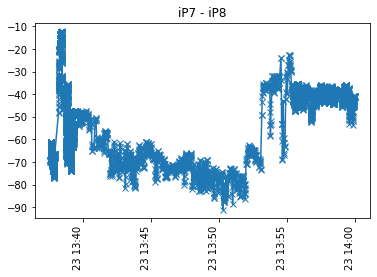

Using exp time


/Users/aliu/code/humanToHuman/env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


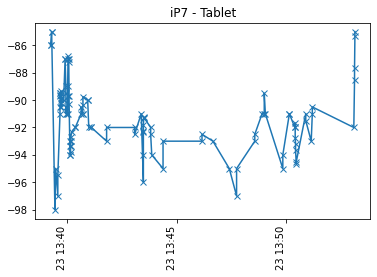

Using exp time


/Users/aliu/code/humanToHuman/env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


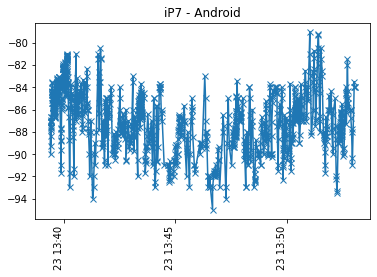

Using exp time


/Users/aliu/code/humanToHuman/env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


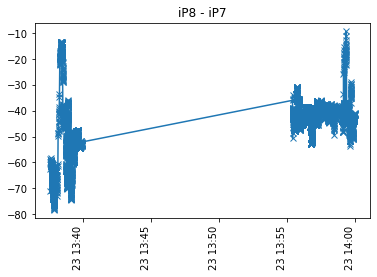

Using exp time


In [14]:
count = 0
step = '30s'
day = '2020-07-22 '

df = df_1
t_start = '13:40:00'
pairs = {}
print('new ------ ', count)
print(t_start)
count+=1
i_list = df.scanner.unique()
for i in i_list:
    j_list = df[df['scanner'] == i].advertiser.unique()
    for j in j_list:
        df_t = df[(df['scanner'] == i) & (df['advertiser'] == j)]
        df_t = df_t.sort_index()

        if df_t.index[-1]-df_t.index[0] > pd.Timedelta('3m'):
            df_t.rssi.rolling('3s').mean().plot(marker='x')
            name1 = device.get(i, str(i))
            name2 = device.get(j, str(j))
            pairs[name1, name2] = (i, j)
            plt.title(name1+' - '+name2)
            plt.xticks(rotation=90)
            plt.show()

            t1 = pd.Timestamp(day+t_start,tz='UTC')+pd.Timedelta(step)
            t2 = pd.Timestamp(day+t_start,tz='UTC')+pd.Timedelta(step)
            df_tt = pd.DataFrame(columns=df_t.columns)
            if t2<df_t.index[-1]:
                print('Using exp time')
                while t2<df_t.index[-1]:
                    s = df_t.between_time(t1.time(),t2.time()).mean()
                    s.name = t1
                    df_tt = df_tt.append(s)
                    t1=t2
                    t2=t2+pd.Timedelta(step)

                '''df_tt.rssi.rolling('3s').mean().plot(marker='o')
                plt.title(name1+' - '+name2)
                plt.xticks(rotation=90)
                plt.show()'''


/Users/aliu/code/humanToHuman/env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


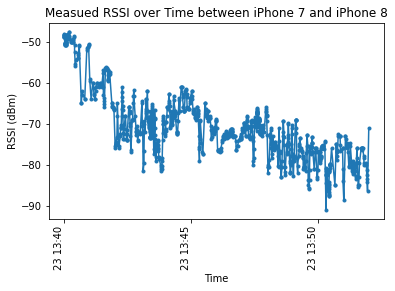

In [61]:
def get_pair_series(p1, p2):
    i,j = pairs[p1, p2]
    df_t = df[(df['scanner'] == i) & (df['advertiser'] == j)]
    return df_t.sort_index()['rssi']    

df_ip7_ip8 = get_pair_series('iP7', 'iP8')
df_ip7_ip8.rolling('3s').mean().between_time('13:40:00', '13:52:00').plot(marker='.')
plt.title('Measued RSSI over Time between iPhone 7 and iPhone 8')
plt.ylabel('RSSI (dBm)')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.show()



/Users/aliu/code/humanToHuman/env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


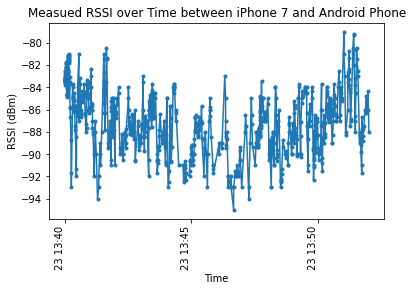

In [62]:
df_ip7_android = get_pair_series('iP7', 'Android')
df_ip7_android.rolling('3s').mean().between_time('13:40:00', '13:52:00').plot(marker='.')
plt.title('Measued RSSI over Time between iPhone 7 and Android Phone')
plt.ylabel('RSSI (dBm)')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.show()


/Users/aliu/code/humanToHuman/env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


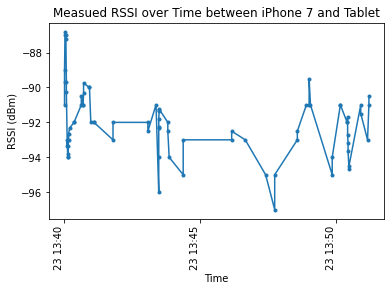

In [63]:
df_ip7_tablet = get_pair_series('iP7', 'Tablet')
df_ip7_tablet.rolling('3s').mean().between_time('13:40:00', '13:52:00').plot(marker='.')
plt.ylabel('RSSI (dBm)')
plt.xlabel('Time')
plt.title('Measued RSSI over Time between iPhone 7 and Tablet')


plt.xticks(rotation=90)
plt.show()

In [ ]:
def get_series_list(series):
    l = []
    l.append(series.between_time('13:40:00', '13:40:55'))
    l.append(series.between_time('13:41:00', '13:41:55'))
    l.append(series.between_time('13:42:00', '13:42:55'))
    l.append(series.between_time('13:43:00', '13:43:55'))
    l.append(series.between_time('13:44:00', '13:44:55'))
    l.append(series.between_time('13:45:00', '13:45:55'))
    l.append(series.between_time('13:46:00', '13:46:55'))
    l.append(series.between_time('13:47:00', '13:47:55'))
    l.append(series.between_time('13:48:00', '13:48:55'))
    l.append(series.between_time('13:49:00', '13:49:55'))
    l.append(series.between_time('13:50:00', '13:50:55'))
    l.append(series.between_time('13:51:00', '13:51:55'))
    l.append(series.between_time('13:52:00', '13:52:55'))
    return l



